<div style='background-image: url("title01.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px'>
<div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computers, Waves, Simulations</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Finite Differences - Grid-Staggering Elastic 1D</div>
        </div>
    </div>
</div>

# Grid-Staggering Elastic 1D

This exercise covers the following aspects:

* Solving velocity-stress formulation of 1D wave equation with finite difference method
* Understanding the grid-staggering in connection with finite difference solution to the elastic wave equation
---

## Basic Equations

The 1D wave equation (velocity-stress formulation) as a coupled system of two first-order partial differential equations

$$
\rho \partial_t v = \partial_x \sigma + f 
$$
$$
\partial_t \sigma = \mu \partial_x v 
$$

where,

$ \sigma $ is the stress,

$ \rho $ is the density,

$ v $ is the velocity,

$ \mu $ is the shear modulus, and

$ f $ is the source.

Grid- staggering is the concept in connection with finite-difference solutions to the elastic wave equation. 
The discrete velocity and stress are defined on a regular spaced grid in space and time. Then, partial derivatives are replaced with centered finite-difference approximations to first derivative. However, these are not defined at the grid points of a function but in-between the grid points.
In grid staggering the following computational scheme is used

$$
\frac{v_i^{j+ \tfrac{1}{2}} - v_i^{j- \tfrac{1}{2}} }{dt} \ = \ \frac{1}{\rho_i}\frac{\sigma_{i + \tfrac{1}{2}}^j - \sigma_{i - \tfrac{1}{2}}^j }{dx} + \frac{f_i^j}{\rho_i} \
$$

$$
\frac{\sigma_{i+\tfrac{1}{2}}^{j+1} - \sigma_{i+\tfrac{1}{2}}^j }{dt} \ = \ \mu_{i+\tfrac{1}{2}}  \frac{v_{i + 1}^{j +\tfrac{1}{2}} - v_i^{j + \tfrac{1}{2}} }{dx}
$$

The extrapolation scheme becomes

$$
v_i^{j+ \tfrac{1}{2}} \ = \ \frac{dt}{\rho_i} \frac{\sigma_{i + \tfrac{1}{2}}^j - \sigma_{i - \tfrac{1}{2}}^j }{dx} \ + \ v_i^{j- \tfrac{1}{2}}  + \frac{dt}{\rho_i} \ f_i^j  \
$$

$$
\sigma_{i+\tfrac{1}{2}}^{j+1} \ = \ dt \ \mu_{i+\tfrac{1}{2}} \frac{v_{i + 1}^{j +\tfrac{1}{2}} - v_i^{j + \tfrac{1}{2}} }{dx} \ + \ \sigma_{i+\tfrac{1}{2}}^j  \ \
$$


**Note that in the codes below we do not deal with the index fractions.**

In [1]:
# Import libraries (Please run it before the simulation code!)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Show Plot in The Notebook
matplotlib.use("nbagg")
matplotlib.rcParams["figure.facecolor"] = "w"  # remove grey background

In [4]:
%matplotlib widget

In [5]:
# Initialization of parameters

# Simple finite difference solver
# Elastic wave equation
# 1-D regular staggered grid

# Basic parameters
nt = 1300  # number of time steps
nx = 1000  # number of grid points in x
c0 = 4500  # velocity (m/sec) (shear wave)
eps = 0.8  # stability limit
isnap = 2  # snapshot frequency
isx = round(nx / 2)  # source location
f0 = 0.1  # frequency (Hz)
xmax = 1000000.0  # maximum range (m)
rho0 = 2500.0  # density (kg/m**3)
mu0 = rho0 * c0**2.0  # shear modulus (Pa)
nop = 4  # number of operator either 2 or 4

dx = xmax / (nx - 1)  # calculate space increment (m)
x = np.arange(nx) * dx  # initialize space coordinates
dt = eps * dx / c0  # calculate time step from stability criterion(s)

# Source time function
t = np.arange(0, nt) * dt  # initialize time axis
T0 = 1.0 / f0  # period
a = 4.0 / T0  # half-width (so called sigma)
t0 = T0 / dt
tmp = np.zeros(nt)
for it in range(nt):
    t = (it - t0) * dt
    tmp[it] = (
        -2 * a * t * np.exp(-((a * t) ** 2))
    )  # derivative of Gaussian (so called sigma)
src = np.zeros(nt)  # source
src[0 : len(tmp)] = tmp
lam = c0 * T0  # wavelength

rho = 2500.0 , f_dom = 0.1 , stability limit = 0.8 , n_lambda 44.955


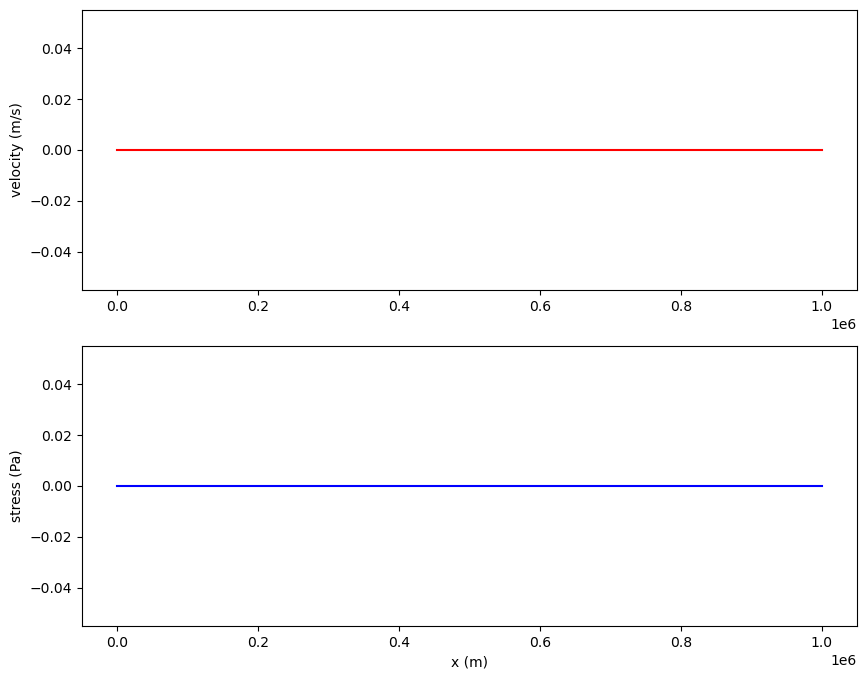

In [6]:
# Extrapolation scheme and the plots
# Initialization of plot

# Initialization of fields
v = np.zeros(nx)  # velocity
vnew = v
dv = v

s = np.zeros(nx)  # stress
snew = s
ds = s

mu = np.zeros(nx)  # shear modulus
rho = mu
rho = rho + rho0
mu = mu + mu0

# Print setup parameters
print(
    "rho =", rho0, ", f_dom =", f0, ", stability limit =", eps, ", n_lambda", (lam / dx)
)

# Initialize the plot
title = "FD Elastic 1D staggered grid"
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
line1 = ax1.plot(x, v, color="red", lw=1.5)
line2 = ax2.plot(x, s, color="blue", lw=1.5)
ax1.set_ylabel("velocity (m/s)")
ax2.set_xlabel("x (m)")
ax2.set_ylabel("stress (Pa)")
plt.ion()
plt.show()

In [7]:
# Begin extrapolation and update the plot
for it in range(nt):
    # Stress derivative
    for i in range(2, nx - 2):
        ds[i] = (
            0.0416666 * s[i - 1]
            - 1.125 * s[i]
            + 1.125 * s[i + 1]
            - 0.0416666 * s[i + 2]
        ) / (dx)

    # Velocity extrapolation
    v = v + dt * ds / rho

    # Add source term at isx
    v[isx] = v[isx] + dt * src[it] / (dt * rho[isx])

    # Velocity derivative
    for i in range(2, nx - 2):
        dv[i] = (
            0.0416666 * v[i - 2]
            - 1.125 * v[i - 1]
            + 1.125 * v[i]
            - 0.0416666 * v[i + 1]
        ) / (dx)

    # Stress extrapolation
    s = s + dt * mu * dv

    # Updating the plots
    if not it % isnap:
        for l in line1:
            l.remove()
            del l
        for l in line2:
            l.remove()
            del l
        line1 = ax1.plot(x, v, color="red", lw=1.5)
        line2 = ax2.plot(x, s, color="blue", lw=1.5)

        ax1.set_title(title + ", time step: %i" % (it))
        plt.gcf().canvas.draw()

plt.ioff()
plt.show()

<Figure size 640x480 with 0 Axes>